In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Sequential


# **Importing mnist images**

In [24]:
(X_train,_),(X_test,_) = mnist.load_data() #Unwrapping the MNIST data

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
X_test.shape

(10000, 28, 28)

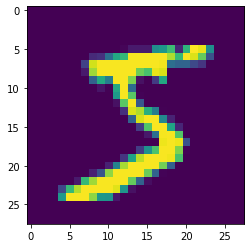

In [32]:
plt.imshow(X_train[0])
plt.show()

# **Image Preprocessing**

In [27]:
X_train_scaled = X_train.astype('float64')/255
X_test_scaled  = X_test.astype('float64')/255

In [28]:
#Reshape to give to Encoder block
X_train_scaled_reshaped = np.reshape(X_train_scaled,newshape = (len(X_train_scaled),28,28,1))
X_test_scaled_reshaped  = np.reshape(X_test_scaled,newshape=(len(X_test_scaled),28,28,1))
print(X_train_scaled_reshaped.shape)
print(X_test_scaled_reshaped.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# **NOTE: Adding noise to the X_train and X_test for the purpose of Noise Reduction**

In [12]:
X_train_noisy =X_train_scaled_reshaped + 0.2 * np.random.normal(loc=0.0, scale=1.0, size=X_train_scaled_reshaped.shape) #Draw random samples from a normal (Gaussian) distribution.
X_test_noisy = X_test_scaled_reshaped + 0.2 * np.random.normal(loc=0.0, scale=1.0, size=X_test_scaled_reshaped.shape)

In [13]:
X_train_noisy.shape,X_test_noisy.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

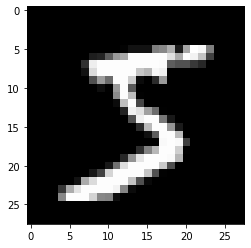

In [15]:
plt.imshow(X_train[0].reshape(28,28),cmap='gray')

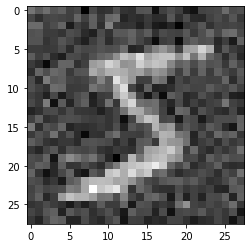

In [14]:
plt.imshow(X_train_noisy[0].reshape(28,28),cmap='gray')

# **Clipping Image**

In [16]:
X_train_clipped = np.clip(X_train_noisy,a_min = 0,a_max = 3)
X_test_clipped  = np.clip(X_test_noisy,a_min=0,a_max=3)

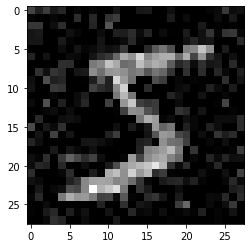

In [17]:
plt.imshow(X_train_clipped[0].reshape(28,28),cmap='gray')

# **Encoding Architecture**

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

# **Decoder Architecture**

In [19]:
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [21]:
model.fit(x=X_train_clipped, y=X_train, epochs=5,validation_data=(X_test_clipped,X_test))

Epoch 1/5
1875/1875 [==============================] - 126s 67ms/step - loss: 2550.1790 - accuracy: 0.6523 - val_loss: 1809.0876 - val_accuracy: 0.7274
Epoch 2/5
1875/1875 [==============================] - 124s 66ms/step - loss: 1658.9449 - accuracy: 0.7398 - val_loss: 1574.4824 - val_accuracy: 0.7580
Epoch 3/5
1875/1875 [==============================] - 123s 66ms/step - loss: 1452.5923 - accuracy: 0.7530 - val_loss: 1382.3621 - val_accuracy: 0.7512
Epoch 4/5
1875/1875 [==============================] - 123s 66ms/step - loss: 1347.3771 - accuracy: 0.7583 - val_loss: 1299.9399 - val_accuracy: 0.7630
Epoch 5/5
1875/1875 [==============================] - 124s 66ms/step - loss: 1272.4467 - accuracy: 0.7616 - val_loss: 1231.3328 - val_accuracy: 0.7675


In [22]:
y_pred = model.predict(X_test_noisy)

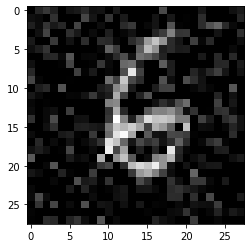

In [23]:
plt.imshow(X_test_clipped[2000].reshape(28,28),cmap='gray') #Original data

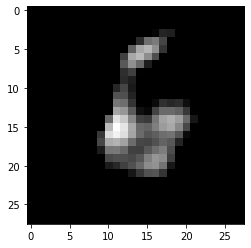

In [24]:
plt.imshow(y_pred[2000].reshape(28,28),cmap='gray') 

# **Validation**

In [74]:
import cv2
image1=cv2.imread(r'noise_image1.jpg',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread(r'noise_image2.jpg',cv2.IMREAD_GRAYSCALE)

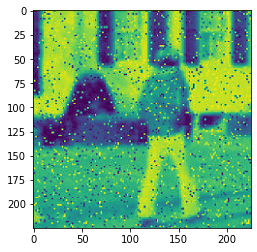

In [75]:
plt.imshow(image1)
plt.show()

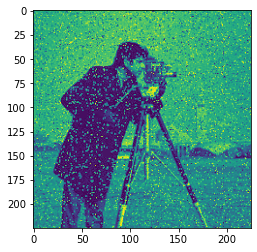

In [76]:
plt.imshow(image2)
plt.show()

In [77]:
image1.shape

(225, 225)

In [78]:
len(image1)

225

In [79]:
image2.shape

(225, 225)

In [80]:
img1 = image1.astype('float32')/255
img2 = image2.astype('float32')/255

In [88]:
img_data = [[[]]]
len(img_data)

1

In [89]:
# from keras.preprocessing.image import img_to_array
resized_image1 = cv2.resize(img1,(28,28))
# img_data.append(resized_image1)

resized_image2 = cv2.resize(img2,(28,28))
# img_data.append(resized_image2)

In [95]:
resized_image1.shape

(28, 28)

In [70]:
len(resized_image1)

28

In [59]:
#Reshape to give to Encoder block
image1_scaled_reshaped = np.reshape(resized_image1,newshape = (len(resized_image1),28,28,1))
image2_scaled_reshaped  = np.reshape(resized_image2,newshape=(len(resized_image2),28,28,1))
print(image1_scaled_reshaped.shape)
print(image2_scaled_reshaped.shape)

ValueError: cannot reshape array of size 2352 into shape (28,28,28,1)